In [1]:
from keras.datasets import mnist

2024-06-14 10:59:53.487286: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-14 10:59:53.537413: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-14 11:00:03.719773: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Carregando o dataset separando os dados de treino e de teste 
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
# Trazendo a função `to_categorical` para transformar os labels em one-hot encoding
from keras.utils import to_categorical
y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)

In [5]:
# Normalização dos dados de entrada
x_treino_norm = x_treino/x_treino.max()
x_teste_norm = x_teste/x_teste.max()

# Reshape dos dados de entrada para achatar as imagens
x_treino_flat = x_treino_norm.reshape(len(x_treino_norm), 28*28)
x_teste_flat = x_teste_norm.reshape(len(x_teste_norm), 28*28)

"""
Why divided by 255?
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. 
"""

In [6]:
# Importação das bibliotecas necessárias para treinar a rede
from keras.models import Sequential
from keras.layers import Dense


In [7]:
# Criação do modelo linear
model = Sequential()
# Neumronios, ativação, input_shape
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/home/rodrigo-07/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Constroi o modelo
model.build()
# Exibe um resumo do modelo
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 575,050 (2.19 MB)

 Trainable params: 575,050 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from keras.optimizers import Adam
adam = Adam()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam)


In [12]:
historico = model.fit(x_treino_flat, y_treino_cat, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8772 - loss: 0.3960 - val_accuracy: 0.9416 - val_loss: 0.1983
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9686 - loss: 0.1024 - val_accuracy: 0.9654 - val_loss: 0.1222
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9782 - loss: 0.0720 - val_accuracy: 0.9700 - val_loss: 0.1003
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9847 - loss: 0.0516 - val_accuracy: 0.9778 - val_loss: 0.0848
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9884 - loss: 0.0385 - val_accuracy: 0.9753 - val_loss: 0.0986


Text(0, 0.5, 'acuracia')

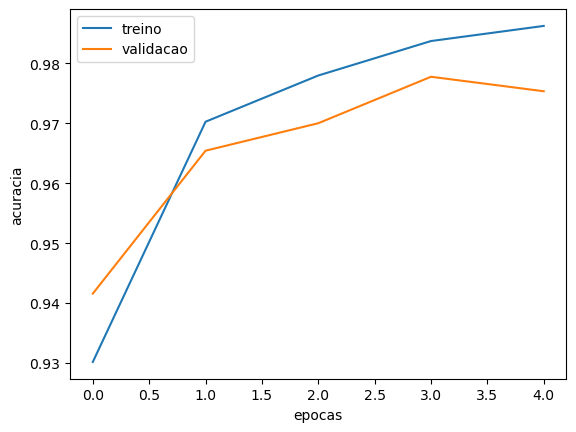

In [14]:
from matplotlib import pyplot as plt

# Exibe o histórico do treinamento
# Graficos de perda e acurácia
# Acurácia
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('acuracia')

Text(0, 0.5, 'perda')

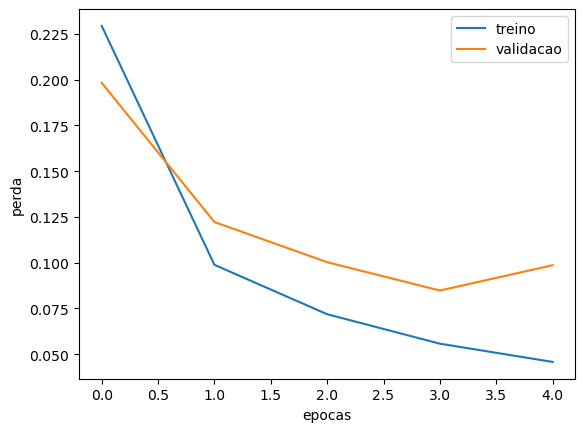

In [15]:
# Perda
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['treino', 'validacao'])
plt.xlabel('epocas')
plt.ylabel('perda')

In [16]:
# Salva o modelo
model.save('modelo_mnist_linear.h5')

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_teste_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_teste_cat, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [20]:
# Realiza uma predição com o modelo
predicao = model.predict(x_teste_flat[0].reshape(1, 28*28))
print(predicao)

np.argmax(predicao)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[5.7681190e-15 1.1405411e-10 9.1011337e-11 6.2292083e-10 1.2894046e-12
  4.4710812e-13 2.8415457e-18 1.0000000e+00 1.9184830e-12 1.4387835e-08]]


7

In [24]:
import numpy as np
from keras.preprocessing import image

# Carrega a imagem
img_path = 'imgTest/sete.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Converte a imagem para um array numpy
img = image.img_to_array(img)

# Normaliza a imagem
img = img / 255.0

# Remodela a imagem para o formato esperado pelo modelo
img = img.reshape(1, 28*28)

# Faz a predição
predicao = model.predict(img)

# Exibe a predição
print(predicao)
print(np.argmax(predicao))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[0.02983204 0.01470852 0.38802597 0.09977664 0.00532359 0.370468
  0.02203685 0.0602272  0.00308537 0.00651573]]
2
